# statistics - Identify some insights of death  in different state each year

In [81]:
import pandas as pd
import io, requests

df=pd.read_csv("NCHS_-_Leading_Causes_of_Death__United_States.csv")

In [82]:
df.head(6)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
5,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13840,33.2


In [83]:
df.tail()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9
10867,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wyoming,30,6.8


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
Year                       10868 non-null int64
113 Cause Name             10868 non-null object
Cause Name                 10868 non-null object
State                      10868 non-null object
Deaths                     10868 non-null int64
Age-adjusted Death Rate    10868 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


In [85]:
df.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000


In [86]:
df.isnull().sum()

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

In [87]:
df.corr()

,Year,Deaths,Age-adjusted Death Rate
Year,1.000000,0.004417,-0.038853
Deaths,0.004417,1.000000,0.231048
Age-adjusted Death Rate,-0.038853,0.231048,1.000000


In [88]:
df=df.drop(['113 Cause Name',"Age-adjusted Death Rate"],axis=1)


In [89]:
df

,Year,Cause Name,State,Deaths
0,2017,Unintentional injuries,United States,169936
1,2017,Unintentional injuries,Alabama,2703
2,2017,Unintentional injuries,Alaska,436
3,2017,Unintentional injuries,Arizona,4184
4,2017,Unintentional injuries,Arkansas,1625
...,...,...,...,...
10863,1999,Kidney disease,Virginia,1035
10864,1999,Kidney disease,Washington,278
10865,1999,Kidney disease,West Virginia,345
10866,1999,Kidney disease,Wisconsin,677


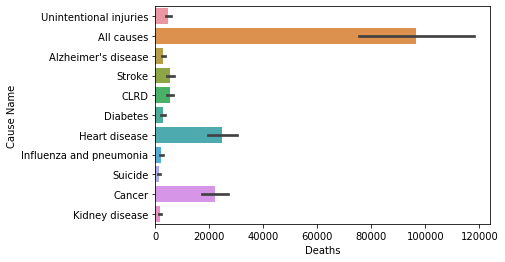

In [90]:
sns.barplot(y=df['Cause Name'],x=df['Deaths'])
plt.show()

In [102]:
#major causes for deaths are : Cancer , Heart disease 
# death rate count per is increased constantly

In [91]:
df['Year'].unique()

array([2017, 2007, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999], dtype=int64)

In [100]:
#most deaths caused by all causes are below including the state and year and no of deaths: 
data=df.groupby("Cause Name").max()
data.max()

Year         2017
State     Wyoming
Deaths    2813503
dtype: object

In [101]:
data=df.groupby("Cause Name").min()
data.min()

Year         1999
State     Alabama
Deaths         21
dtype: object

In [94]:
# most deaths in 2017 in Wyoming and least in 1999 in  Alabama



In [105]:
data=df.groupby("Year").max()
data

,Cause Name,State,Deaths
Year,,,
1999,Unintentional injuries,Wyoming,2391399
2000,Unintentional injuries,Wyoming,2403351
2001,Unintentional injuries,Wyoming,2416425
2002,Unintentional injuries,Wyoming,2443387
2003,Unintentional injuries,Wyoming,2448288
2004,Unintentional injuries,Wyoming,2397615
2005,Unintentional injuries,Wyoming,2448017
2006,Unintentional injuries,Wyoming,2426264
2007,Unintentional injuries,Wyoming,2423712


In [106]:
data=df.groupby("Year").min()
data.min()

Cause Name    All causes
State            Alabama
Deaths                21
dtype: object

In [107]:
# most deaths in 2017 in Wyoming  are 2813503 and least in 1999 in  Alabama are 21



In [116]:
# total deaths in every state
data=df["Deaths"].groupby(df["State"]).sum()
data

State
Alabama                  1603535
Alaska                    117890
Arizona                  1572443
Arkansas                  987455
California               8169513
Colorado                 1039435
Connecticut               981027
Delaware                  255015
District of Columbia      168907
Florida                  5868231
Georgia                  2326265
Hawaii                    320652
Idaho                     375595
Illinois                 3489953
Indiana                  1934641
Iowa                      954486
Kansas                    831840
Kentucky                 1423885
Louisiana                1409567
Maine                     433412
Maryland                 1469677
Massachusetts            1812189
Michigan                 3011369
Minnesota                1288025
Mississippi               992097
Missouri                 1905549
Montana                   294784
Nebraska                  513032
Nevada                    652604
New Hampshire             353884
New 

In [117]:
# total deaths in every year
data=df["Deaths"].groupby(df["Year"]).sum()
data

Year
1999    8594450
2000    8611090
2001    8631566
2002    8724520
2003    8720806
2004    8523496
2005    8675996
2006    8561880
2007    8540026
2008    8689930
2009    8551328
2010    8641568
2011    8769558
2012    8839734
2013    9014608
2014    9129652
2015    9451294
2016    9556734
2017    9790068
Name: Deaths, dtype: int64

In [118]:
# total deaths by every cause
data=df["Deaths"].groupby(df["Cause Name"]).sum()
data

Cause Name
All causes                 95457138
Alzheimer's disease         2989632
CLRD                        5189854
Cancer                     21687288
Diabetes                    2799886
Heart disease              24445280
Influenza and pneumonia     2189282
Kidney disease              1717226
Stroke                      5453046
Suicide                     1394032
Unintentional injuries      4695640
Name: Deaths, dtype: int64